# Importing Packages

## For SVD model

In [44]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [45]:
from surprise import Dataset, Reader

from surprise import SVD
from surprise.model_selection import \
    train_test_split

from surprise import accuracy

import csv
import itertools
from surprise import accuracy
from collections import defaultdict

## For text recommendation

In [13]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from IPython.display import Image, HTML
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

sb.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', 100)

## For Kmeans clustering

In [79]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython.display import Image, HTML
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
sb.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from nltk.tokenize import RegexpTokenizer


from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


pd.set_option('display.max_columns', 100)

# 1. Data Preparation

## 1.1 For SVD model

In [6]:
#Importing datasets
data_1 = pd.read_excel('jester-data-1.xls', sheet_name='jester-data-1-new', header=None)  #24983
data_2 = pd.read_excel('jester-data-2.xls', sheet_name='jester-data-2-new', header=None)  #23500
data_3 = pd.read_excel('jester-data-3.xls', sheet_name='jester-data-3-new', header=None)  #24938

dataSet = pd.concat([data_1, data_2, data_3], axis=0, ignore_index=True)
print(dataSet.shape)
dataSet.tail()

(73421, 101)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
73416,21,99.0,99.0,99.0,99.0,5.78,8.45,99.00,8.20,99.0,8.5,99.0,99.00,99.00,99.00,99.00,8.30,9.81,99.00,10.00,99.00,99.00,99.0,99.0,99.0,99.0,99.00,99.00,7.62,99.00,99.00,99.00,99.00,99.0,7.38,99.00,99.00,99.0,8.45,99.00,99.00,8.54,99.00,99.0,99.0,9.95,99.00,7.38,8.54,99.0,...,8.54,8.06,99.00,99.00,99.00,10.00,7.82,99.0,7.91,99.0,99.00,99.00,6.46,99.0,7.72,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
73417,16,99.0,99.0,99.0,99.0,5.24,99.00,99.00,5.68,99.0,99.0,99.0,99.00,3.20,99.00,7.86,-3.20,0.39,7.86,0.68,-1.65,99.00,99.0,99.0,99.0,99.0,99.00,99.00,99.00,6.36,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.0,10.00,8.40,99.00,8.40,99.00,99.0,99.0,99.00,7.67,99.00,99.00,99.0,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.0,99.00,99.0,99.00,9.81,99.00,99.0,99.00,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.00,99.0,8.35,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
73418,35,99.0,99.0,99.0,99.0,-3.93,99.00,-9.03,-2.67,99.0,99.0,99.0,99.00,3.74,99.00,-0.83,-9.66,-9.90,4.66,0.78,3.35,5.92,99.0,99.0,99.0,99.0,99.00,-3.01,3.30,4.71,99.00,0.68,8.93,99.0,99.00,-8.69,8.79,99.0,99.00,5.87,5.34,99.00,3.25,99.0,99.0,99.00,-1.21,99.00,-1.89,99.0,...,99.00,99.00,8.30,99.00,99.00,0.19,99.00,99.0,99.00,99.0,0.24,3.50,99.00,99.0,5.34,2.62,99.0,-0.63,7.82,6.99,-9.61,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.0,99.0,99.0,99.0,99.0,5.29,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
73419,21,99.0,99.0,99.0,99.0,9.42,9.66,99.00,9.17,99.0,99.0,99.0,9.81,99.00,99.00,99.00,5.97,4.08,99.00,9.81,6.94,9.27,99.0,99.0,99.0,99.0,99.00,8.83,9.37,5.58,9.32,99.00,8.69,99.0,9.56,99.00,99.00,99.0,99.00,99.00,99.00,99.00,8.88,99.0,99.0,99.00,99.00,99.00,9.47,99.0,...,9.56,99.00,99.00,9.37,99.00,99.00,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.0,9.81,99.00,99.0,7.52,99.00,99.00,99.00,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
73420,35,99.0,99.0,99.0,99.0,0.19,99.00,-1.50,7.82,99.0,99.0,99.0,5.10,99.00,4.47,99.00,-3.98,-4.51,99.00,-2.91,-2.91,9.13,99.0,99.0,99.0,99.0,7.04,9.95,9.95,9.61,99.00,6.70,6.65,99.0,99.00,1.55,99.00,99.0,9.42,8.11,9.47,99.00,4.17,99.0,99.0,99.00,8.20,99.00,9.17,99.0,...,99.00,99.00,5.97,1.89,7.96,6.75,99.00,99.0,99.00,99.0,1.94,8.74,99.00,99.0,1.36,7.18,99.0,99.00,0.49,99.00,99.00,5.87,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,6.65,99.0,99.0,99.0,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


In [7]:
#Replacing values 99 with NaN
dataSet[(dataSet==99)] = np.nan

## 1.2 For text model

In [14]:
directory_path = 'jokes' # insert path to folder with all individual joke files
filenames = []
jokes = []
for file in os.listdir(directory_path):
    if file.endswith(".html"):
        file = os.path.join(directory_path, file)
        joke = pd.read_html(file,flavor ='bs4')[0]
        if type(joke[0].iloc[0])== np.float64:
            jokes.append(joke[1])
        else:
            jokes.append(joke[0])
            
df_jokes = pd.concat(jokes, ignore_index=True)

In [15]:
ex_dict = {
    'Jokes': df_jokes
}

columns = ['Jokes']

df_noid = pd.DataFrame(ex_dict)

In [16]:
df = pd.DataFrame(df_noid)

df["ID"] = df.index + 1

## 1.3 For Kmeans Clustering

In [57]:
data1 = pd.read_excel('jester-data-1.xls', sheet_name='jester-data-1-new', header=None, names=(x for x in range(0,101)))

test_data = pd.read_excel('jesterjoke2.xlsx', sheet_name = 'Sheet1',header = None)  #name of jester 2 joke texts

new_testdata = test_data[100:]
new_testdata.rename(columns={0:'Jokes'},inplace=True)
new_testdata['Jokes']
new_testdata["ID"] = new_testdata.index + 1


C:\Users\munkh\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-57-e99a0f842870>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_testdata["ID"] = new_testdata.index + 1


# 2. Data Exploration

In [8]:
ratings = pd.DataFrame(dataSet.iloc[:, 1:])         #Dataframe with only ratings
number_ppl = pd.DataFrame(ratings.T.count())        #number of ratings with respect to people
number_joke = pd.DataFrame(ratings.count())         #number of ratings with respect to jokes

In [9]:
avg_ppl = ratings.T.mean()                          #average ratings per person
avg_joke = ratings.mean()                           #average ratings of jokes

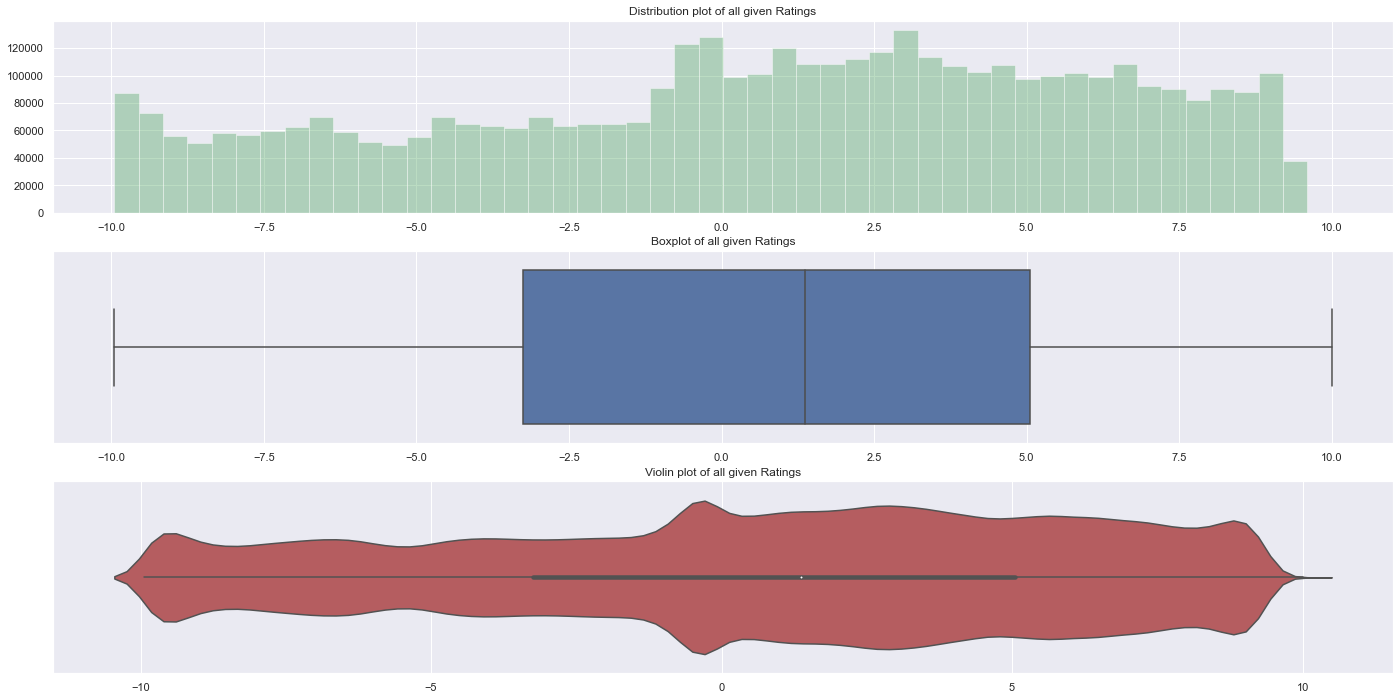

In [33]:
#Distribution plot of all ratings
f, axes = plt.subplots(3, 1, figsize=(24, 12))
axes[0].set_title('Distribution plot of all given Ratings')
axes[1].set_title('Boxplot of all given Ratings')
axes[2].set_title('Violin plot of all given Ratings')
sb.distplot(ratings, kde=False, ax=axes[0], color='g')
sb.boxplot(ratings, orient='h', ax=axes[1])
sb.violinplot(ratings, color='r', ax=axes[2])

# 2.1 By Jokes

In [17]:
averages = dataSet.drop([0], axis=1).mean()
averages.sort_values(ascending=False)
average = averages.reset_index()
ave = average.drop(columns = ['index'])

dff = pd.DataFrame(df)

dff["AverageRating"] = ave

dff

,Jokes,ID,AverageRating
0,"A man visits the doctor. The doctor says ""I ha...",1,0.901997
1,"Two cannibals are eating a clown, one turns to...",2,0.162989
2,Q: Whats the difference between greeting a Que...,3,0.193411
3,"Q. What do a hurricane, a tornado, and a redne...",4,-1.412599
4,A guy stood over his tee shot for what seemed ...,5,0.235352
...,...,...,...
95,"Just a thought .. Before criticizing someone, ...",96,1.373027
96,Two attorneys went into a diner and ordered tw...,97,1.489106
97,A teacher is explaining to her class how diffe...,98,0.869864
98,Age and Womanhood 1. Between the ages of 13 an...,99,-0.036189


In [30]:
#Jokes, from the highest average rating to the lowest average rating
dff.sort_values(by="AverageRating", ascending=False)

,Jokes,ID,AverageRating
49,One Sunday morning William burst into the livi...,50,3.362593
88,A radio conversation of a US naval ship with C...,89,3.348026
31,A Jewish young man was seeing a psychiatrist f...,32,2.974698
35,How many Irishmen does it take to change a lig...,36,2.917245
26,A man arrives at the gates of heaven. St. Pete...,27,2.907989
...,...,...,...
12,This couple had an excellent relationship goin...,13,-1.944859
43,"The graduate with a Science degree asks, ""Why ...",44,-1.998306
14,What's the difference between a used tire and ...,15,-2.112506
15,A duck walks into a pharmacy and asks for a co...,16,-3.103138


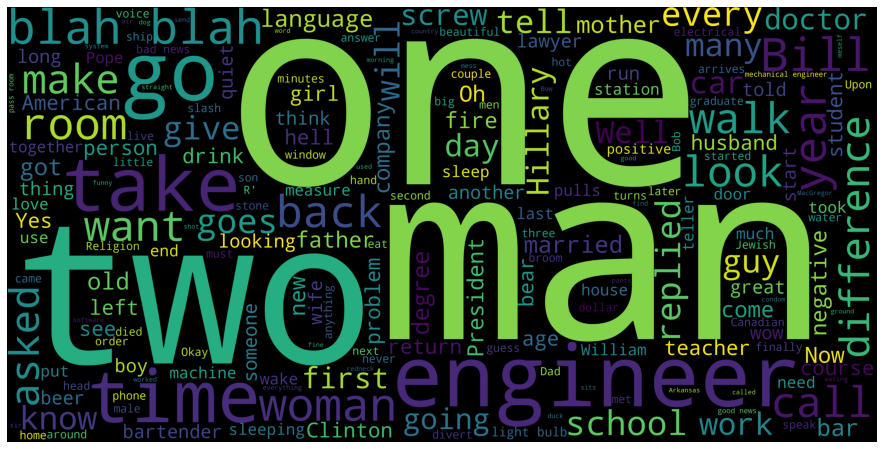

In [19]:
#Word cloud of all the jokes
jokewords = ' '.join(dff['Jokes'])

STOPWORDS = set(STOPWORDS)
STOPWORDS.add("say")
STOPWORDS.add("joke")
STOPWORDS.add("say")
STOPWORDS.add("asks")
STOPWORDS.add("says")
STOPWORDS.add("said")
STOPWORDS.add("replies")

joke_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', height = 2000, width = 4000).generate(jokewords)
plt.figure(figsize = (16,8))
plt.imshow(joke_wordcloud)
plt.axis('off')
plt.show()

Text(0.5, 0, 'Average Rating of Jokes')

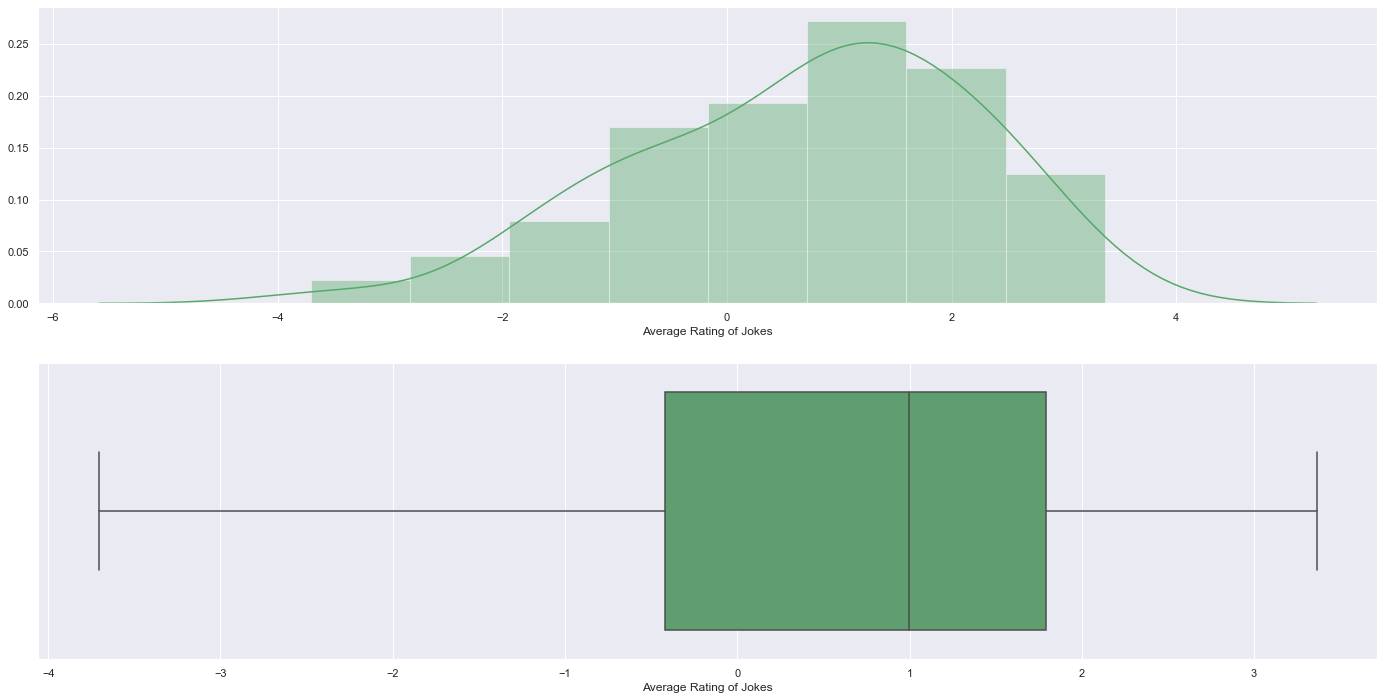

In [27]:
#Distribution plots of average rating by jokes
f, axes = plt.subplots(2, 1, figsize=(24, 12))
sb.distplot(avg_joke, ax=axes[0], color='g')
axes[0].set_xlabel('Average Rating of Jokes')
sb.boxplot(avg_joke, orient='h', ax=axes[1], color='g')
axes[1].set_xlabel('Average Rating of Jokes')

Text(0, 0.5, 'Number of Ratings')

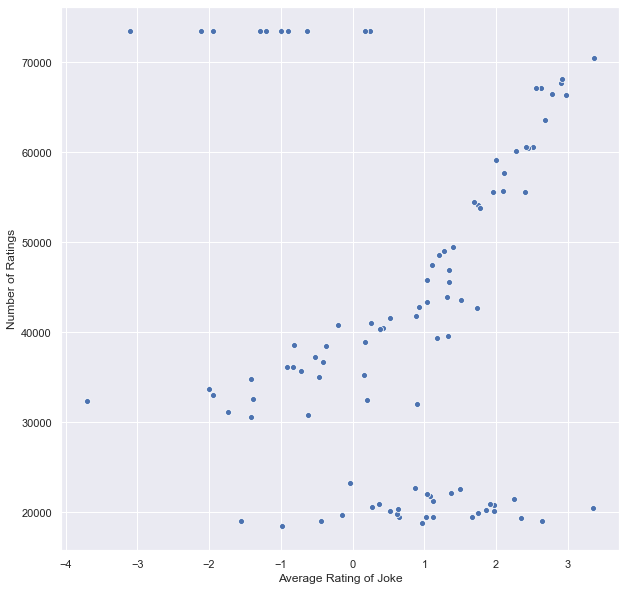

In [29]:
#Jokes that are rated more times might have rated higher than those rated less times
number_joke = ratings.count()
f, axes = plt.subplots(1, 1, figsize=(10,10))
sb.scatterplot(avg_joke, number_joke)
plt.xlabel('Average Rating of Joke')
plt.ylabel('Number of Ratings')

## 2.2 By people

Text(0.5, 0, 'Average Rating of People')

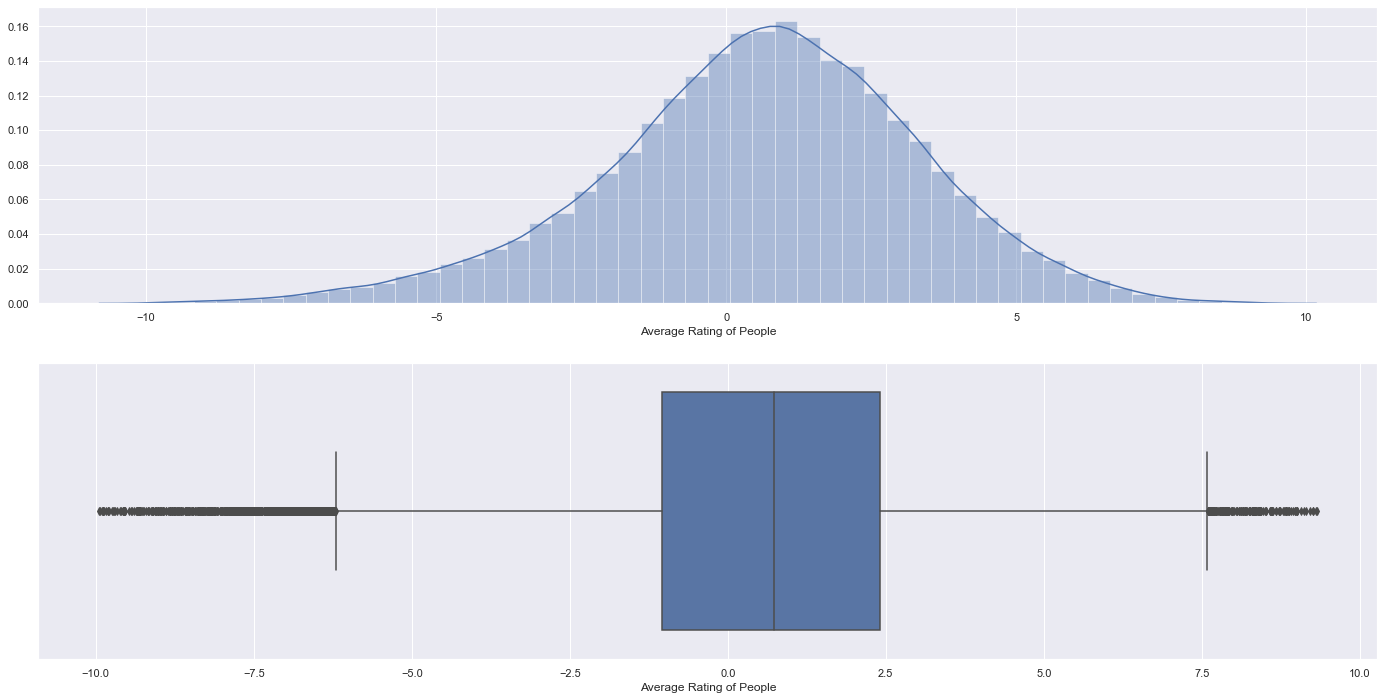

In [28]:
#Distribution plots of average rating by people
f, axes = plt.subplots(2, 1, figsize=(24, 12))
sb.distplot(avg_ppl, ax=axes[0])
axes[0].set_xlabel('Average Rating of People')
sb.boxplot(avg_ppl, orient='h', ax=axes[1])
axes[1].set_xlabel('Average Rating of People')

# 3. Machine Learning

## 3.1 SVD Model

In [70]:
user_Id = pd.DataFrame({'user_Id' : range(1, 73422)})
ratings_with_userId = pd.concat([user_Id, ratings], axis=1)
ratings_unpivoted = pd.melt(ratings_with_userId, id_vars=['user_Id'])

In [71]:
ratings_unpivoted = ratings_unpivoted.dropna().rename(columns = {'variable':'joke_Id', 'value':'Rating'})
ratings_unpivoted

,user_Id,joke_Id,Rating
0,1,1,-7.82
1,2,1,4.08
4,5,1,8.50
5,6,1,-6.17
7,8,1,6.84
...,...,...,...
7317160,48482,100,3.98
7317226,48548,100,9.22
7317465,48787,100,-3.50
7317708,49030,100,-8.79


In [72]:
reader = Reader(rating_scale=(-10, 10))
data = Dataset.load_from_df(ratings_unpivoted[['user_Id', 'joke_Id', 'Rating']], reader)

In [73]:
trainset = data.build_full_trainset()
nothing, testset = train_test_split(data, test_size=1.0)

In [74]:
algo = SVD(n_factors=100)
algo.fit(trainset)

In [111]:
rating_pred = algo.test(testset)

In [112]:
print("Accuracy (RMSE) on whole dataset :", accuracy.rmse(rating_pred, verbose=True))

RMSE: 3.1627
Accuracy (RMSE) on whole dataset : 3.162673006491097


In [115]:
result_svd = pd.DataFrame(rating_pred, columns=['user_Id', 'joke_Id', 'real', 'predicted(SVD)', 'details'])

result_svd_real = result_svd[['user_Id', 'joke_Id', 'real']].pivot_table(index=['user_Id'], columns=['joke_Id'])
result_svd_pred = result_svd[['user_Id', 'joke_Id', 'predicted(SVD)']].pivot_table(index=['user_Id'], columns=['joke_Id'])

In [116]:
def top_five_accuracy(real, pred):
    total_correct_prediction = 0
    total_prediction = 0
    for user_Id in pred.T:
        predicted_ratings = list(pred.iloc[user_Id-1].fillna(-10))
        real_ratings = list(real.iloc[user_Id-1].fillna(-10))
        if len(predicted_ratings) > 5:
            top_five_index_pred = sorted(range(len(predicted_ratings)), key=lambda i: predicted_ratings[i])[-5:]
            top_five_index_real = sorted(range(len(real_ratings)), key=lambda i: real_ratings[i])[-5:]
            correct_prediction = len(set(top_five_index_pred) & set(top_five_index_real))
            total_correct_prediction += correct_prediction
            total_prediction += 5
        else:
            pass
            top_index_pred = sorted(range(len(predicted_ratings)), key=lambda i: predicted_ratings[i])[-len(predicted_ratings):]
            top_index_real = sorted(range(len(real_ratings)), key=lambda i: real_ratings[i])[-len(predicted_ratings):]
            correct_prediction = len(set(top_five_index_pred) & set(top_five_index_real))
            total_correct_prediction += correct_prediction
            total_prediction += len(predicted_ratings)
    return total_correct_prediction/(total_prediction)

In [121]:
real = result_svd_real
pred = result_svd_pred

In [120]:
print('HitRate (How much percentage of top 5 jokes of each user is our model predicting?): ', 
      top_five_accuracy(real, pred)*100, '%')

HitRate (How much percentage of top 5 jokes of each user is our model predicting?):  49.60351942904618 %


## 3.2 Text Recommendation

In [ ]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(dff['Jokes'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

results = {}
for idx, row in dff.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], dff['ID'][i]) for i in similar_indices]
    results[row['ID']] = similar_items[1:] 

In [49]:
linear_kernel(tfidf_matrix, tfidf_matrix).round(3)

array([[1.   , 0.011, 0.   , ..., 0.008, 0.   , 0.   ],
       [0.011, 1.   , 0.   , ..., 0.012, 0.   , 0.   ],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.008, 0.012, 0.   , ..., 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 1.   ]])

In [50]:
listrec = []

def item(id):
    name   = dff.loc[dff['ID'] == id]['Jokes'].tolist()[0].split(' // ')[0]
    prediction = name
    return prediction

def rating(id):
    name2   = dff.loc[dff['ID'] == id]['AverageRating'].tolist()[0]
    prediction2 = name2
    return prediction2

def recommend(item_id, num):
    print('Recommending ' + str(num) + ' products similar to ' + item(item_id))
    print('---')
    recs = results[item_id][:num]
    for rec in recs:
        print('\nRecommended: ' + item(rec[1]) + '\n(Joke ID: ' + str(rec[1]) + ')'+ '\n(Average Rating: ' + str(rating(rec[1])) + ')' + '\n(Similarity Score:' + str(rec[0]) + ')' )
        listrec.append(str(rec[1]))

In [51]:
recommend(item_id = 65, num = 5)

Recommending 5 products similar to Once upon a time, two brooms fell in love and decided to get married. Before the ceremony, the bride broom informed the groom broom that she was expecting a little whiskbroom. The groom broom was aghast! "How is this possible?" he asked. "We've never swept together!
---

Recommended: One Sunday morning William burst into the living room and said, "Dad! Mom! I have some great news for you! I am getting married to the most beautiful girl in town. She lives a block away and her name is Susan." After dinner, William's dad took him aside. "Son, I have to talk with you. Your mother and I have been married 30 years.. She's a wonderful wife but she has never offered much excitement in the bedroom, so I used to fool around with women a lot. Susan is actually your half-sister, and I'm afraid you can't marry her." William was heart-broken. After eight months he eventually started dating girls again. A year later he came home and very proudly announced, "Dianne s

In [52]:
listrec

['50', '57', '53', '47', '6']

## 3.3 Clustering jokes using Kmeans method

In [82]:
import nltk
from nltk.corpus import stopwords


import nltk
nltk.download('stopwords')

import nltk
from nltk.corpus import stopwords


stopwords = nltk.corpus.stopwords.words('english')
newStopWords = 'says replies replied said asked just ve ll goes does say one two go going asks want every time'.split()
stopwords.extend(newStopWords)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\munkh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
dff1 = dff[:50]
dff2 = dff[50:100]

In [85]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 5, stop_words = stopwords,max_features= 17)
tfidf_matri = tf.fit(dff['Jokes'])
tfidf_matrix = tfidf_matri.transform(dff1['Jokes'])
unseen_tfidf = tf.transform(dff2['Jokes'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


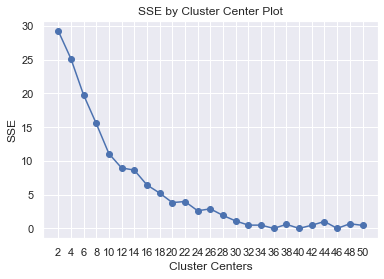

In [86]:
#used to find the optimal number of clusters
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=50, batch_size=5, random_state=1).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tfidf_matrix, 50)

In [87]:
clusters =  MiniBatchKMeans(n_clusters=8, init_size=40, batch_size=5, random_state=100000).fit_predict(tfidf_matrix)


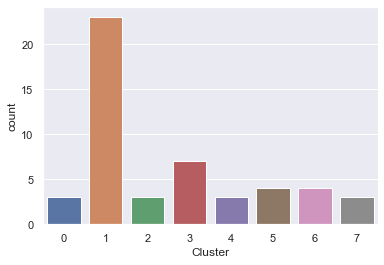

In [88]:


# Append Labels to the Data
X_labeled = dff1.copy()
X_labeled["Cluster"] = pd.Categorical(clusters)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

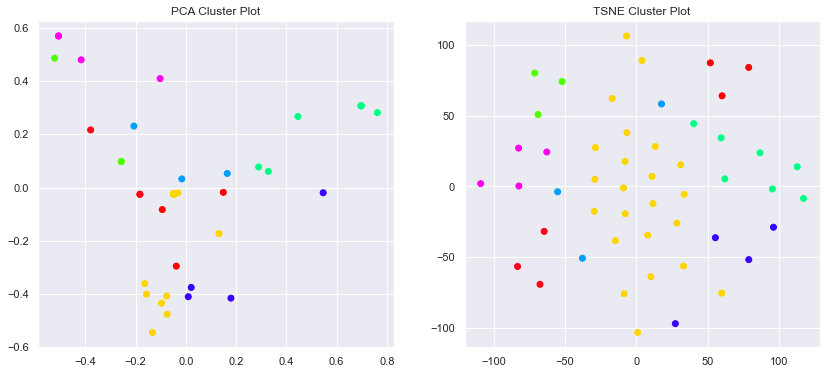

In [89]:
#Visualise the clusters of the train dataset
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=50, replace=False)
    
    pca = PCA(n_components=15).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=15).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=50, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(tfidf_matrix, clusters)

In [90]:
#Top keywords in each cluster 
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i+1))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(tfidf_matrix, clusters, tf.get_feature_names(), 10)


Cluster 1
make,know,engineer,difference,car,bill,would,man,get,like

Cluster 2
back,car,would,man,get,make,room,many,take,engineer

Cluster 3
would,know,get,engineer,difference,car,bill,like,walks,back

Cluster 4
get,engineer,car,bill,know,would,well,woman,man,difference

Cluster 5
engineer,difference,car,bill,get,man,walks,woman,make,well

Cluster 6
engineer,car,bill,know,would,man,take,difference,room,get

Cluster 7
get,engineer,difference,car,bill,would,man,woman,know,walks

Cluster 8
make,know,get,engineer,difference,car,walks,like,would,bill


In [91]:
#Create Clustering Model using KMeans and Fitting the Clustering Model on the Test Data
clusters_test =  MiniBatchKMeans(n_clusters=8, init_size=5000, batch_size=2048, random_state=20).fit(tfidf_matrix)
clusters_test =  clusters_test.predict(unseen_tfidf)
clusters_test


array([2, 1, 4, 1, 1, 1, 1, 1, 6, 3, 6, 1, 2, 1, 1, 4, 1, 1, 1, 6, 1, 7,
       1, 7, 4, 1, 7, 1, 1, 1, 4, 1, 4, 7, 1, 5, 4, 4, 1, 0, 1, 5, 1, 3,
       1, 1, 1, 1, 0, 1])

In [103]:
clusters_test2 =  MiniBatchKMeans(n_clusters=8, init_size=5000, batch_size=2048, random_state=20).fit(unseen_tfidf)
clusters_test2 =  clusters_test2.predict(unseen_tfidf)
clusters_test2

array([6, 3, 1, 2, 2, 0, 0, 5, 7, 0, 7, 0, 6, 5, 0, 1, 0, 2, 0, 7, 0, 4,
       2, 4, 3, 0, 4, 0, 0, 5, 1, 0, 3, 4, 2, 6, 1, 1, 0, 0, 2, 6, 0, 0,
       0, 0, 0, 5, 0, 0])

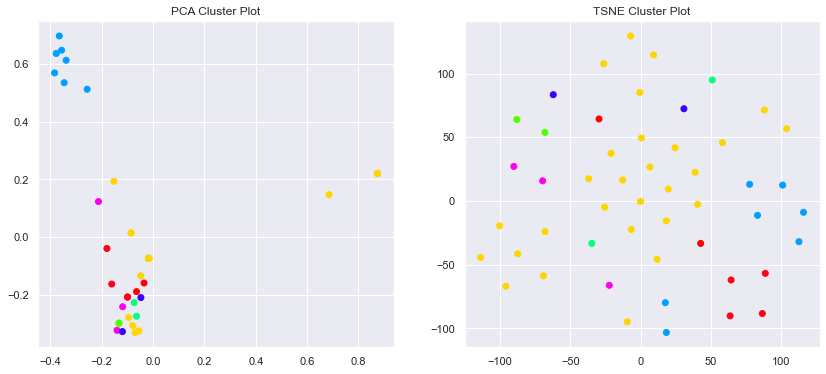

In [92]:
# Visualize the Clusters in the Data
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=50, replace=False)
    
    pca = PCA(n_components=15).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=15).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=50, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(unseen_tfidf, clusters_test)

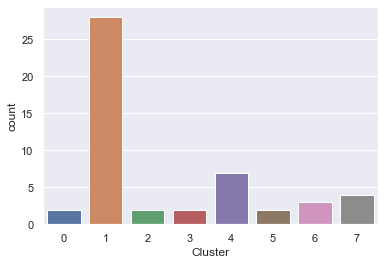

In [93]:
# Append Labels to the Data
X2_labeled = dff2.copy()
X2_labeled["Cluster"] = pd.Categorical(clusters_test)

# Summary of the Cluster Labels
sb.countplot(X2_labeled["Cluster"])

In [94]:
X_labeled

,Jokes,ID,AverageRating,Cluster
0,"A man visits the doctor. The doctor says ""I ha...",1,0.901997,3
1,"Two cannibals are eating a clown, one turns to...",2,0.162989,1
2,Q: Whats the difference between greeting a Que...,3,0.193411,5
3,"Q. What do a hurricane, a tornado, and a redne...",4,-1.412599,1
4,A guy stood over his tee shot for what seemed ...,5,0.235352,4
5,They asked the Japanese visitor if they have e...,6,1.330277,1
6,The father was very anxious to marry off his o...,7,-0.633947,0
7,Q: What did the blind person say when given so...,8,-0.996267,1
8,Q. What is orange and sounds like a parrot? A....,9,-0.620039,0
9,How many men does it take to screw in a light ...,10,1.181706,1


In [95]:
X2_labeled

,Jokes,ID,AverageRating,Cluster
50,"The Pope dies and, naturally, goes to heaven. ...",51,-0.816913,2
51,"A woman has twins, and gives them up for adopt...",52,-0.201118,1
52,A man and Cindy Crawford get stranded on a des...,53,2.550239,4
53,Why are there so many Jones's in the phone boo...,54,2.405780,1
54,How many teddybears does it take to change a l...,55,0.382450,1
55,The Chukcha (Russian Eskimo) phones up the Rus...,56,1.686032,1
56,Bill & Hillary are on a trip back to Arkansas....,57,-1.940810,1
57,What did the Buddhist say to the hot dog vendo...,58,-3.704541,1
58,"During a recent publicity outing, Hillary snea...",59,-0.521804,6
59,A group of managers were given the assignment ...,60,-0.406815,3


In [104]:
tfidf_matrix

<50x17 sparse matrix of type '<class 'numpy.float64'>'
	with 72 stored elements in Compressed Sparse Row format>

In [105]:
unseen_tfidf

<50x17 sparse matrix of type '<class 'numpy.float64'>'
	with 74 stored elements in Compressed Sparse Row format>

In [106]:
clusters #shows the clusters each joke is in from 1 to 100

array([3, 1, 5, 1, 4, 1, 0, 1, 0, 1, 6, 1, 1, 3, 3, 7, 2, 5, 1, 4, 2, 1,
       1, 1, 3, 7, 1, 3, 1, 1, 6, 0, 1, 3, 3, 1, 1, 6, 1, 6, 2, 5, 1, 1,
       1, 1, 4, 1, 7, 5])

In [107]:
clusters_test #shows the clusters each joke is in from 101 to 150

array([2, 1, 4, 1, 1, 1, 1, 1, 6, 3, 6, 1, 2, 1, 1, 4, 1, 1, 1, 6, 1, 7,
       1, 7, 4, 1, 7, 1, 1, 1, 4, 1, 4, 7, 1, 5, 4, 4, 1, 0, 1, 5, 1, 3,
       1, 1, 1, 1, 0, 1])

In [108]:
metrics.fowlkes_mallows_score(clusters_test2, clusters_test)

0.5540897098214058

In [109]:
metrics.homogeneity_score(clusters_test2, clusters_test)

0.6315394876262225

In [110]:
metrics.completeness_score(clusters_test2, clusters_test)

0.7620212151726189